# What are Neural Networks?

## Introduction

### Neural networks are a machine learning model inspired by the human brain. They consist of layers of interconnected nodes (or neurons), that process and learn from data. Neural networks are widely used in tasks like image recognition, speech processing, finance, and even game-playing AI. Their ability to detect complex patterns and relationships in data makes them a powerful tool.

### Unlike traditioanl algorithms, neural networks do not require explicit rules to make decisions. Instead, they learn from examples, improving over time as they are trained with more data.

## How do Neural Networks Work?

### A neural network processes data through multiple layers:

1.   Input Layer: first layer receives raw data, such as images or numerical values
2.   Hidden Layers: these layers perform calculations to find patterns in the data. Each neuron in these layers applies a weight, adds a bias, and passes the result through an activation function
3.   Output Layer: this layer produces the final prediction or classification based on the processed data

### This network learns by adjusting the weights and biases in the hidden layers using a technique called backpropagation, which minimizes errors by continuously refining predictions by comparing actual values and updating parameters.



## Types of Neural Networks

### There are different types of neural networks, each suited for specific tasks:

1.   Feedforward Neural Networks (FNN): simplest, where data moves in one direction from input to output
2.   Convolutional Neural Networks (CNN): used mainly in image recognition, CNN's can detect patterns liked edges and shapes
3.   Recurrent Neural Networks (RNN): designed for sequential data like speech and text, RNN's remember past inputs using loops
4.   Deep Neural Networks (DNN): contain multiple hidden layers, allowing them to model complex relationships



## Key components of a Neural Network

*   Neurons: building blocks that process and transmit information
*   Weights & Biases: adjustable parameters that influence the network's decisions
*   Activation Functions: functions like ReLU, Sigmoid, or Tanh that decide how information flows through the network
*   Loss Function: measures the error between predicted and actual values, guiding the learning process
*   Optimizer: algorithms like Gradient Descent adjust weights to minimize errors



## Training a Neural Network

1.   Forward Propagation: data passes through the network to generate a prediction
2.   Loss Calculation: the difference between the prediction and the actual value is measured
3.   Backpropagation: the network adjusts weights and biases to reduce errors
3.   Iteration: steps 1-3 are repeated multiple times until the network achieves high accuracy

### Training requires a large dataset and multiple iterations to fine-tune the model's performance.

## Advantages and Limitations

### Advantages

*   Can regonize complex patterns in large datasets
*   Learns and improves over time with more data
*   Works well for image recognition, speech processing, and text analysis

### Limitations

*   Requires a lot of data and computational power
*   Training can take a long time
*   Hard to interpret why a network makes a specific decision



# Neural Networks in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

mlp = MLPClassifier(hidden_layer_sizes = (50, 25), max_iter = 1000, random_state = 42)
mlp.fit(X_train_balanced, y_train_balanced)

y_pred_mlp = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.96555
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.99      0.60      0.75      1703

    accuracy                           0.97     20000
   macro avg       0.98      0.80      0.87     20000
weighted avg       0.97      0.97      0.96     20000



# Visualizing Results

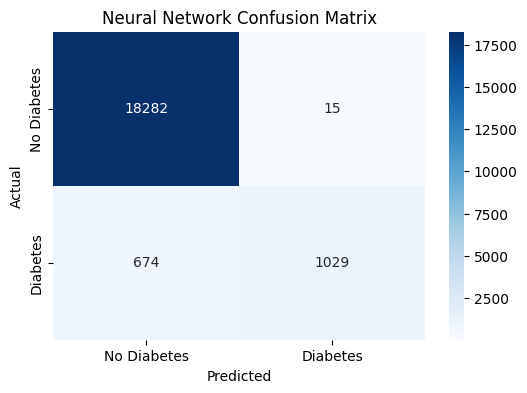

In [2]:
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

### This shows how well the model predicted who has diabetes and who doesn't.

*   True Positives - 1029 people with diabetes were correctly predicted to have it.
*   True Negatives - 18282 people without diabetes were correctly predicted to not have it.
*   False Positives - 15 people without diabetes were wrongly predicted to have it.
*   False Negatives - 674 people with diabetes were wrongly predicted to not have it.

### This model is really good at identifying people without diabetes (99.92% accuracy), but it's less accurate at finding people who actually have diabetes (60.42% accuracy).


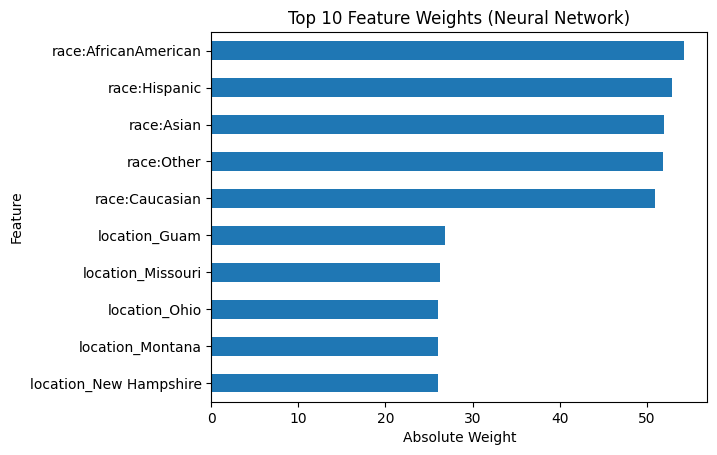

In [3]:
import numpy as np
feature_weights = pd.Series(np.abs(mlp.coefs_[0]).sum(axis = 1), index = X.columns)
feature_weights.nlargest(10).plot(kind = 'barh')
plt.title('Top 10 Feature Weights (Neural Network)')
plt.xlabel('Absolute Weight')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

*   The top features are mostly race and some locations (like Guam and New Hampshire).
*   "Race: African American" had the strongest weight, followed closely by other race categories.

### This model relies heavily on a person's race and location when deciding if they have diabetes. This might not be ideal - it could mean the model is picking up patterns that don't reflect personal health behavior directly.

